In [38]:
import torch

In [39]:
X = torch.tensor([[1.0, 4.0, 7.0], [2.0, 3.0, 6.0]])

In [40]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [41]:
type(X)

torch.Tensor

In [42]:
X.shape

torch.Size([2, 3])

In [43]:
type(X.shape)

torch.Size

In [44]:
X.dtype

torch.float32

In [45]:
X[0, 1]

tensor(4.)

In [46]:
X[1, :]

tensor([2., 3., 6.])

In [47]:
X + 1

tensor([[2., 5., 8.],
        [3., 4., 7.]])

In [48]:
10 * (X + 1)

tensor([[20., 50., 80.],
        [30., 40., 70.]])

In [49]:
X.exp()

tensor([[   2.7183,   54.5982, 1096.6332],
        [   7.3891,   20.0855,  403.4288]])

In [50]:
X.mean()

tensor(3.8333)

In [51]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [52]:
X.max(dim=0)

torch.return_types.max(
values=tensor([2., 4., 7.]),
indices=tensor([1, 0, 0]))

In [53]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]])

In [54]:
type(X.numpy())

numpy.ndarray

In [55]:
X[:, 1] = -99

In [56]:
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]])

In [57]:
X.relu()

tensor([[1., 0., 7.],
        [2., 0., 6.]])

In [58]:
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]])

Define device

In [60]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [61]:
device

'mps'

In [64]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
M = M.to(device)

In [66]:
M.device

device(type='mps', index=0)

In [69]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [70]:
M

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='mps:0')

In [71]:
M.device

device(type='mps', index=0)

In [72]:
R = M @ M.T

In [73]:
R

tensor([[14., 32.],
        [32., 77.]], device='mps:0')

Time

In [83]:
M = torch.rand((1000, 1000))

In [84]:
M

tensor([[0.0675, 0.4164, 0.8097,  ..., 0.8716, 0.7579, 0.6112],
        [0.4086, 0.5737, 0.4280,  ..., 0.1160, 0.9107, 0.8784],
        [0.9702, 0.7968, 0.0544,  ..., 0.4791, 0.0089, 0.0333],
        ...,
        [0.3184, 0.0639, 0.9801,  ..., 0.3446, 0.0441, 0.6751],
        [0.2876, 0.6351, 0.4476,  ..., 0.2417, 0.2409, 0.0278],
        [0.0322, 0.3307, 0.0874,  ..., 0.0902, 0.5734, 0.7379]])

In [85]:
M.shape

torch.Size([1000, 1000])

In [87]:
%timeit M @ M.T

926 μs ± 11 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [88]:
M = torch.rand((1000, 1000), device=device)

In [89]:
%timeit M @ M.T

370 μs ± 1.46 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Atograd

In [109]:
x = torch.tensor(5.0, requires_grad=True)

In [110]:
x.grad

In [111]:
f = x ** 2

In [112]:
f

tensor(25., grad_fn=<PowBackward0>)

In [113]:
f.backward()

In [114]:
x.grad

tensor(10.)

In [115]:
x

tensor(5., requires_grad=True)

In [116]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad

In [117]:
x

tensor(4., requires_grad=True)

In [119]:
x.grad.zero_()

tensor(0.)

In [121]:
x.grad

tensor(0.)

In [122]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2 # forward pass
    f.backward() # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad # gradient descent step
    x.grad.zero_() # reset the gradients
    print(x)

tensor(4., requires_grad=True)
tensor(3.2000, requires_grad=True)
tensor(2.5600, requires_grad=True)
tensor(2.0480, requires_grad=True)
tensor(1.6384, requires_grad=True)
tensor(1.3107, requires_grad=True)
tensor(1.0486, requires_grad=True)
tensor(0.8389, requires_grad=True)
tensor(0.6711, requires_grad=True)
tensor(0.5369, requires_grad=True)
tensor(0.4295, requires_grad=True)
tensor(0.3436, requires_grad=True)
tensor(0.2749, requires_grad=True)
tensor(0.2199, requires_grad=True)
tensor(0.1759, requires_grad=True)
tensor(0.1407, requires_grad=True)
tensor(0.1126, requires_grad=True)
tensor(0.0901, requires_grad=True)
tensor(0.0721, requires_grad=True)
tensor(0.0576, requires_grad=True)
tensor(0.0461, requires_grad=True)
tensor(0.0369, requires_grad=True)
tensor(0.0295, requires_grad=True)
tensor(0.0236, requires_grad=True)
tensor(0.0189, requires_grad=True)
tensor(0.0151, requires_grad=True)
tensor(0.0121, requires_grad=True)
tensor(0.0097, requires_grad=True)
tensor(0.0077, requires_

In [123]:
t = torch.tensor(2.0, requires_grad=True)
z = t.exp() # this is an intermediate result
z += 1 # this is an in-place operation
z.backward()

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor []], which is output 0 of ExpBackward0, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

# Linear regression

In [124]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [127]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((11610, 8), (3870, 8), (11610,), (3870,))

In [128]:
X_train

array([[   3.5214    ,   15.        ,    3.04994451, ...,    1.60599334,
          37.63      , -122.43      ],
       [   5.3275    ,    5.        ,    6.49005964, ...,    3.44333996,
          33.69      , -117.39      ],
       [   3.1       ,   29.        ,    7.54237288, ...,    2.25084746,
          38.44      , -122.98      ],
       ...,
       [   1.5561    ,   35.        ,    4.13993174, ...,    3.27645051,
          34.11      , -117.29      ],
       [   2.1055    ,   52.        ,    5.17849462, ...,    2.92688172,
          36.76      , -119.79      ],
       [   5.6022    ,   31.        ,    6.21971253, ...,    2.53798768,
          38.04      , -122.2       ]], shape=(11610, 8))

In [170]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

In [171]:
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
y_valid = torch.FloatTensor(y_valid).reshape(-1, 1)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)

In [172]:
torch.manual_seed(42)
n_features = X_train.shape[1] # there are 8 input features
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

In [173]:
n_features

8

In [174]:
w

tensor([[ 0.3367],
        [ 0.1288],
        [ 0.2345],
        [ 0.2303],
        [-1.1229],
        [-0.1863],
        [ 2.2082],
        [-0.6380]], requires_grad=True)

In [175]:
w.shape

torch.Size([8, 1])

In [176]:
b

tensor(0., requires_grad=True)

In [177]:
b.shape

torch.Size([])

Train

In [178]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
    y_pred = X_train @ w + b
    loss = ((y_pred - y_train) ** 2).mean() # mse
    loss.backward() #backprop
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: 16.158437728881836
Epoch 2/20, Loss: 4.879364013671875
Epoch 3/20, Loss: 2.255221366882324
Epoch 4/20, Loss: 1.3307626247406006
Epoch 5/20, Loss: 0.9680702686309814
Epoch 6/20, Loss: 0.8142684698104858
Epoch 7/20, Loss: 0.7417051792144775
Epoch 8/20, Loss: 0.7020707726478577
Epoch 9/20, Loss: 0.6765924692153931
Epoch 10/20, Loss: 0.6577970385551453
Epoch 11/20, Loss: 0.6426156163215637
Epoch 12/20, Loss: 0.6297227144241333
Epoch 13/20, Loss: 0.6184945702552795
Epoch 14/20, Loss: 0.6085972189903259
Epoch 15/20, Loss: 0.599821925163269
Epoch 16/20, Loss: 0.5920189619064331
Epoch 17/20, Loss: 0.5850693583488464
Epoch 18/20, Loss: 0.5788735151290894
Epoch 19/20, Loss: 0.5733455419540405
Epoch 20/20, Loss: 0.5684102177619934


In [179]:
X_train @ w + 1

tensor([[1.1109],
        [1.1155],
        [0.8116],
        ...,
        [0.1309],
        [0.3782],
        [1.7389]], grad_fn=<AddBackward0>)

In [180]:
X_new = X_test[:3]

In [181]:
w

tensor([[ 0.9142],
        [ 0.1941],
        [-0.3354],
        [ 0.3345],
        [ 0.0282],
        [-0.0922],
        [-0.3295],
        [-0.3016]], requires_grad=True)

In [182]:
b

tensor(2.0821, requires_grad=True)

In [183]:
with torch.no_grad():
    y_new = X_new @ w + b
y_new

tensor([[0.8916],
        [1.6480],
        [2.6577]])

# Linear Regression Using PyTorch’s High-Level API

In [184]:
import torch.nn as nn # by convention, this module is usually imported th
torch.manual_seed(42) # to get reproducible results
model = nn.Linear(in_features=n_features, out_features=1)

In [186]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [189]:
type(model.weight)

torch.nn.parameter.Parameter

In [187]:
model.weight.shape

torch.Size([1, 8])

In [188]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [190]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [196]:
model.named_parameters()

<generator object Module.named_parameters at 0x30e37f450>

In [197]:
model(X_train[:2])

tensor([[-0.4718],
        [ 0.1131]], grad_fn=<AddmmBackward0>)

In [198]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

In [203]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward() # compute gradients
        optimizer.step() # update params using gradients
        optimizer.zero_grad() # zero out gradients
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

In [204]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.3378520011901855
Epoch 2/20, Loss: 0.7802940607070923
Epoch 3/20, Loss: 0.6253843307495117
Epoch 4/20, Loss: 0.6060434579849243
Epoch 5/20, Loss: 0.5956299304962158
Epoch 6/20, Loss: 0.5873566269874573
Epoch 7/20, Loss: 0.5802989602088928
Epoch 8/20, Loss: 0.5741381645202637
Epoch 9/20, Loss: 0.5687100291252136
Epoch 10/20, Loss: 0.5639079213142395
Epoch 11/20, Loss: 0.5596510767936707
Epoch 12/20, Loss: 0.5558737516403198
Epoch 13/20, Loss: 0.5525193810462952
Epoch 14/20, Loss: 0.5495391488075256
Epoch 15/20, Loss: 0.5468899011611938
Epoch 16/20, Loss: 0.5445338487625122
Epoch 17/20, Loss: 0.5424376726150513
Epoch 18/20, Loss: 0.5405715703964233
Epoch 19/20, Loss: 0.5389096736907959
Epoch 20/20, Loss: 0.5374288558959961


In [205]:
X_new = X_test[:3]
with torch.no_grad():
    y_pred = model(X_new)
y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

# Sequential

In [206]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [207]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 5.045480251312256
Epoch 2/20, Loss: 2.0523130893707275
Epoch 3/20, Loss: 1.0039887428283691
Epoch 4/20, Loss: 0.857014000415802
Epoch 5/20, Loss: 0.7740675806999207
Epoch 6/20, Loss: 0.7225847244262695
Epoch 7/20, Loss: 0.6893725991249084
Epoch 8/20, Loss: 0.6669032573699951
Epoch 9/20, Loss: 0.6507739424705505
Epoch 10/20, Loss: 0.6383934617042542
Epoch 11/20, Loss: 0.6281994581222534
Epoch 12/20, Loss: 0.6193400621414185
Epoch 13/20, Loss: 0.6113174557685852
Epoch 14/20, Loss: 0.6038705706596375
Epoch 15/20, Loss: 0.5968309044837952
Epoch 16/20, Loss: 0.5901119709014893
Epoch 17/20, Loss: 0.5836468935012817
Epoch 18/20, Loss: 0.5774065256118774
Epoch 19/20, Loss: 0.5713556408882141
Epoch 20/20, Loss: 0.5654448866844177


# Mini-batch GD using dataloaders

In [214]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, 
                          batch_size=32, 
                          shuffle=True,
                          num_workers=14,
                          pin_memory=True,
                          persistent_workers=True,
                          prefetch_factor=2)

In [215]:
# extra code – build the model just like earlier
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 1)
)

model = model.to(device)

# extra code – build the optimizer and loss function, as earlier
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()

In [216]:
def train(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0.
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        mean_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {mean_loss:.4f}")

In [217]:
train(model, optimizer, mse, train_loader, n_epochs)

/Users/artyomkholodkov/Desktop/handson-mlp/.venv/lib/python3.14/site-packages/torch/utils/data/dataloader.py:1118: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


Epoch 1/20, Loss: 0.5900
Epoch 2/20, Loss: 0.4116
Epoch 3/20, Loss: 0.3837
Epoch 4/20, Loss: 0.3646
Epoch 5/20, Loss: 0.3617
Epoch 6/20, Loss: 0.3507
Epoch 7/20, Loss: 0.3457
Epoch 8/20, Loss: 0.3412
Epoch 9/20, Loss: 0.3374
Epoch 10/20, Loss: 0.3352
Epoch 11/20, Loss: 0.3312
Epoch 12/20, Loss: 0.3309
Epoch 13/20, Loss: 0.3327
Epoch 14/20, Loss: 0.3253
Epoch 15/20, Loss: 0.3207
Epoch 16/20, Loss: 0.3187
Epoch 17/20, Loss: 0.3162
Epoch 18/20, Loss: 0.3123
Epoch 19/20, Loss: 0.3091
Epoch 20/20, Loss: 0.3067


# Evaluation

In [218]:
def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
    model.eval()
    metrics = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric = metric_fn(y_pred, y_batch)
            metrics.append(metric)
    return aggregate_fn(torch.stack(metrics))

In [219]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.2997, device='mps:0')

In [220]:
def rmse(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean().sqrt()

evaluate(model, valid_loader, rmse)

tensor(0.5289, device='mps:0')

In [221]:
valid_mse.sqrt()

tensor(0.5475, device='mps:0')

In [222]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.5475, device='mps:0')

torchmetrics

In [223]:
import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

In [224]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.5475, device='mps:0')

In [228]:
import matplotlib.pyplot as plt
import numpy as np

Epoch 1/20, train loss: 0.7909, train metric: 0.8894, valid metric: 0.6688
Epoch 2/20, train loss: 0.4367, train metric: 0.6608, valid metric: 0.6117
Epoch 3/20, train loss: 0.3929, train metric: 0.6269, valid metric: 0.5965
Epoch 4/20, train loss: 0.3769, train metric: 0.6140, valid metric: 0.6007
Epoch 5/20, train loss: 0.3660, train metric: 0.6050, valid metric: 0.6217
Epoch 6/20, train loss: 0.3584, train metric: 0.5987, valid metric: 0.5958
Epoch 7/20, train loss: 0.3523, train metric: 0.5936, valid metric: 0.5928
Epoch 8/20, train loss: 0.3487, train metric: 0.5905, valid metric: 0.6050
Epoch 9/20, train loss: 0.3452, train metric: 0.5876, valid metric: 0.5754
Epoch 10/20, train loss: 0.3409, train metric: 0.5839, valid metric: 0.6169
Epoch 11/20, train loss: 0.3373, train metric: 0.5808, valid metric: 0.5910
Epoch 12/20, train loss: 0.3364, train metric: 0.5799, valid metric: 0.5995
Epoch 13/20, train loss: 0.3336, train metric: 0.5776, valid metric: 0.5917
Epoch 14/20, train lo

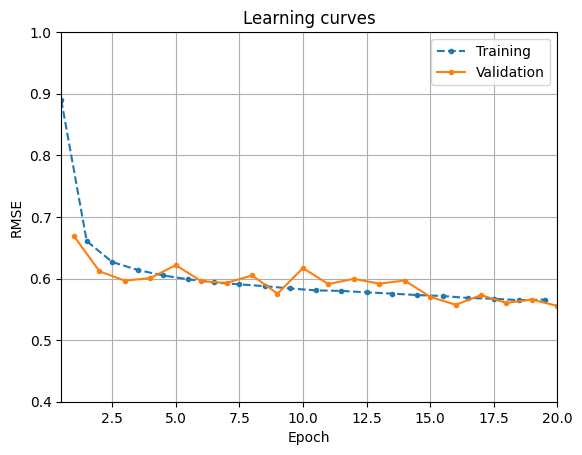

In [229]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 30), nn.ReLU(),
    nn.Linear(30, 1)
)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

# Since we compute the training metric
plt.plot(np.arange(n_epochs) + 0.5, history["train_metrics"], ".--",
         label="Training")
plt.plot(np.arange(n_epochs) + 1.0, history["valid_metrics"], ".-",
         label="Validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.legend()
plt.show()